In [1]:
#St Louis Power Outage: Where political power is concentrated and where the lights are off.
# Purpose of the dataset is to understand the political concentration of St 
#  by looking at the behavior of and laws passed by the Board of Alderman. 

import pandas as pd
import numpy as np

#Function edits the dataframe in place
def clean_bb_data(df:pd.DataFrame):
    df['President Proposal'] = boardbill_df['Ward'] == 'President'
    df['Passed'] = boardbill_df['Ordinance'] != 0
    #Remove digits from BB data
    temp = df['Board Bill'].str.replace(pat=r'\D', repl='', regex=True)
    temp = pd.to_numeric(temp)
    df['Board Bill'].update(temp)
    #Remove digits from Ward
    temp = df['Ward'].str.replace(pat=r'\D', repl='', regex=True).astype(str)
    
    df.update(temp)
    return None


raw_boardbill_df = pd.read_csv(
    r'C:\Users\\legis\Documents\BoardBill.csv', encoding='iso-8859-1')

boardbill_df = raw_boardbill_df.copy()


clean_bb_data(boardbill_df)





boardbill_df.update(boardbill_df.sort_values(['Session', 'Ward','Board Bill'], ascending=[True, True, True]))
print(boardbill_df)


        Session Board Bill                                              Title  \
0     2015-2016          1                                    Budget FY 15-16   
1     2015-2016         10        Redevelopment plan for 4245 West Pine Blvd.   
2     2015-2016        100                             Transit Sales Tax 1997   
3     2015-2016        101                           Transportation Sales Tax   
4     2015-2016        102  Vacation of alley at Martin Luther King, Whitt...   
...         ...        ...                                                ...   
1679  2021-2022         82                   American Rescue Plan Act of 2021   
1680  2021-2022         83       Honorary Naming of Captain David Dorn Avenue   
1681  2021-2022         84  Adult Vaccination Supplemental Program Service...   
1682  2021-2022         85            Fourteenth Ward Liquor Control District   
1683  2021-2022          9  Airport Debt Service Stabilization Fund to the...   

                 Alderman  

In [2]:
## ============= Outline ============== 
## Feature 1: Data Analyses
#####################################
## Story:   A citizen is curious how productive their representative is compared to others.
##              They want a politician that is bringing relevant funds to their community and representing the group identity in both symbolic and tangible ways.
##              How do they know if their locally elected alderman is effective at representing their interests?
## Stats at a Glance:
##      Basic regional comparative stuff:
##         
##      Conceptions of Legislative Effectiveness:
##          ## Characteristic:
##              X is a characteristic of Y. This can be considered metadata for the set. What is the relationship between the primary key and the column in question?
##          ## Dimensional
##                      1D
##                      -- Number of Bills (PK) [Bills] => [Count] 
##                      2D
##                      -- Number of Bills Passed [Status, Bills] => [Status, Count] =Filter[Status = Passed]> [Count]
##                      3D
##                      -- Number of bills passed per alderman [Alderman, Status, Bills] => [Alderman, Status, Count] => [Alderman, Count]
##                      -- Number of bills passed per ward [ward, Status, Bills] => [ward, Status, Count] =Filter[Status = Passed]> [ward, Count]
##                      4D
##                      -- Number of bills passed per alderman per year [Year, Alderman, Status, Bills] => [Year, Alderman, Count]
##          ## Relationship:
##                  --   Difference, Distance, Time, Weight, Volume, 
##                  --   Two Cards: Alder A vs Alder B or Alder A vs Median B
##                  --   Two Cards: ward A vs ward B or ward A vs Median B
##          ## Calculated:
##              -- Proposed to Passed Ratio = fn(Proposed / Passed)
##          ##  Ordinal:
##              
##              -- Top n in y Population
##              -- Bottom n in y population
##

## Group Functions Count, Max, Min


## Influential 
## Influential Naysayer
## Influence by local racial makeup

##################################################
#
##################################################              
##              Do you believe that ## summary of bill## should have passed? blind test
##              ## You were represented well.
##              -- You favored x and they voted for x.
##              -- You were against x and they voted against x.
##              -- You cared about the issue that 
##              ## You were not represented well, according to your survey. 
##              -- You favored x but y voted against it.
##              -- You were against x but y voted for it.
##              -- You were apathetic about this issue but your representative proposed the board bill
##                  ** It is okay to disagree with this assessment, but please let us know why here [hyperlink to survey]
##          
## A. Which wards have had the most ordinances come from it?
##      Each row represents one proposed ordinance 
##     Requirements:
##          Wards, the quantity of bills passed, the quantity of bills proposed, the quantity of bills
##          Wards, the quantity of bills proposed, the ratio of proposed to passed bills
##          Proposed to Passed Ratio with an explanation of what it means immmediately following
## A1.
## B. 
##          Which ward are you in? 
## c
## Feature 2: Illustrations

## Visualization ideas - ward map over time

## Feature 3: Communication Strategy
## Feature 4: Alder Labeling

##Column Notes
#Session is represented as XXXX-YYYY
#Board Bill Should be Converted to an integer instead of a 

In [3]:
## Back to Basics
#-- Number of Bills (PK) [Bills] => [Count] 
class data_analysis():
    def __init__(self,df:pd.DataFrame):
        self.df = df.copy()
        self.number_of_bills = len(df)
        self.number_of_bills_passed = len(df['Passed']==True)
        self.number_of_bills_not_passed = len(df['Passed']==False)

        self.bills_passed_df = df.get(df['Passed']==True)
        self._groupby_example = df[['Passed', 'Board Bill']].groupby(['Passed']).count().copy().at[False,'Board Bill']
        
        self.bills_per_ward_df = boardbill_df[['Session','Ward','Passed','Board Bill']].groupby(['Passed','Ward','Session'],0).count().reset_index().copy()
        self.bills_per_alderman_df = boardbill_df[['Session','Alderman','Passed','Board Bill']].groupby(['Passed','Alderman','Session'],0).count().reset_index().copy()
        self._2015_bb_passed = self.bills_per_ward_df.query('Passed == True & Session == "2015-2016"').reset_index().get(['Ward','Board Bill']).copy()
        self._2016_bb_passed = self.bills_per_ward_df.query('Passed == True & Session == "2016-2017"').reset_index().get(['Ward','Board Bill']).copy()
        self._2017_bb_passed = self.bills_per_ward_df.query('Passed == True & Session == "2017-2018"').reset_index().get(['Ward','Board Bill']).copy()
        self._2018_bb_passed = self.bills_per_ward_df.query('Passed == True & Session == "2018-2019"').reset_index().get(['Ward','Board Bill']).copy()
        self._2019_bb_passed = self.bills_per_ward_df.query('Passed == True & Session == "2019-2020"').reset_index().get(['Ward','Board Bill']).copy()
        self._2020_bb_passed = self.bills_per_ward_df.query('Passed == True & Session == "2020-2021"').reset_index().get(['Ward','Board Bill']).copy()
        self._2021_bb_passed = self.bills_per_ward_df.query('Passed == True & Session == "2021-2022"').reset_index().get(['Ward','Board Bill']).copy()
        #self._2015_bb_passed_chart = self._2015_bb_passed.plot(x='Ward', y='Board Bill',kind='Bar')
        
        print('Data Analysis Complete')
bb_data_analysis = data_analysis(boardbill_df)

Data Analysis Complete


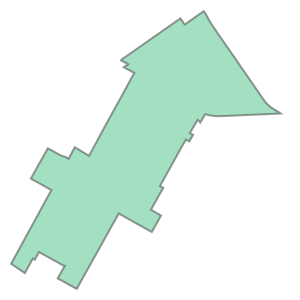

In [5]:
filepath = r'C:\Users\legis\Documents\nbrhds_wards\WARDS_2010'
import shapefile
from shapely.geometry import mapping, shape

stl_shapefile = shapefile.Reader(filepath)
shapely_map = mapping(stl_shapefile)
shape(shapely_map['features'][0]['geometry'])